# Load Dependencies

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from matplotlib.dates import YearLocator, DateFormatter
from statsmodels.tsa.seasonal import seasonal_decompose


# ToDo/Erkenntnisse
* Daten mit Woche 53 sind alle Null 

sj-Datensatz
* Es gibt Ausreißer z.B. zwischen 1995-11-01 - 1996-01-01
* Ab ca. Periode 200 sind Saisondaten unbrauchbar wegen Overfit
* Vor ca. Periode 25 sind Saisondaten unbrauchbar wegen Underfit

Quelle der Datensätze: https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/

In [29]:
df_train = pd.read_csv("dataset/dengue_features_train.csv")
df_labels = pd.read_csv("dataset/dengue_labels_train.csv")

Lösche alle Daten der Woche 53, da sie alle Null sind

In [30]:
df_labels = df_labels[df_labels['weekofyear'] != 53]

Konvertiere die Wochennummer und Jahre in Datetime-kompatible Daten für bessere Verarbeitung

In [31]:
df_labels['date'] = pd.to_datetime(df_labels['year'].astype(str) + df_labels['weekofyear'].astype(str) + '1',
                                       format='%Y%U%w')

Aufteilung des Dataframe in zwei verschiedene:
ein sj Dataframe für die Fälle der Stadt San Juan
ein iq Dataframe für die Fälle der Stadt Iquitos

In [32]:
df_sj = df_labels.loc[df_train['city']=='sj']
df_iq = df_labels.loc[df_train['city']=='iq']

Darstellung aller Fälle und ihren Zeitpunkt in San Juan in einem Graph

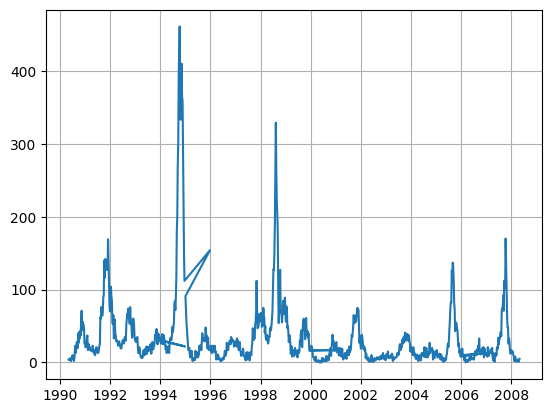

In [33]:
plt.plot(df_sj['date'],df_sj['total_cases'])
plt.grid()
plt.show()

Näherer Blick auf verschiedene Zeiträume

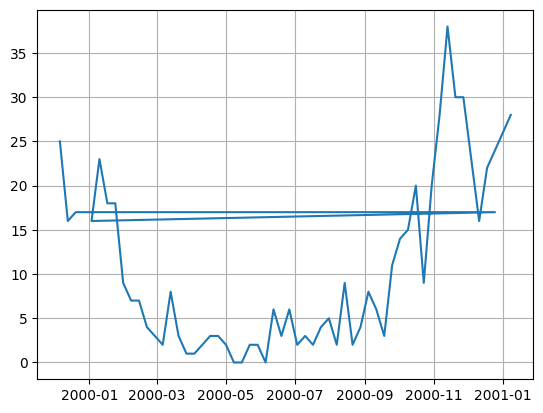

In [34]:
df_sj_time = df_sj[(df_sj['date'] >= '1999-12-01') & (df_sj['date'] <= '2001-01-08')]
plt.plot(df_sj_time['date'],df_sj_time['total_cases'])
plt.grid()
plt.show()

Zeige Daten in diesem Zeitraum

In [35]:
pd.set_option('display.max_rows', None)
print(df_sj_time)

    city  year  weekofyear  total_cases       date
500   sj  1999          49           25 1999-12-06
501   sj  1999          50           16 1999-12-13
502   sj  1999          51           17 1999-12-20
503   sj  2000          52           17 2000-12-25
504   sj  2000           1           16 2000-01-03
505   sj  2000           2           23 2000-01-10
506   sj  2000           3           18 2000-01-17
507   sj  2000           4           18 2000-01-24
508   sj  2000           5            9 2000-01-31
509   sj  2000           6            7 2000-02-07
510   sj  2000           7            7 2000-02-14
511   sj  2000           8            4 2000-02-21
512   sj  2000           9            3 2000-02-28
513   sj  2000          10            2 2000-03-06
514   sj  2000          11            8 2000-03-13
515   sj  2000          12            3 2000-03-20
516   sj  2000          13            1 2000-03-27
517   sj  2000          14            1 2000-04-03
518   sj  2000          15     

Dekomposition der Fälle aus San Juan in Trend, Saison, Residual
Mehrmalige Dekomposition mit steigenden Betrachtungsperioden

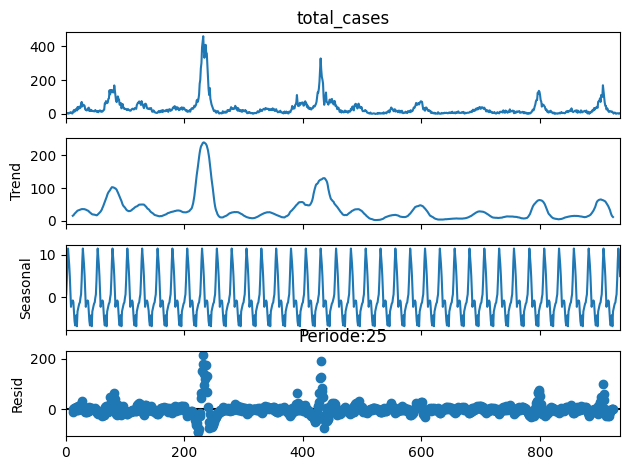

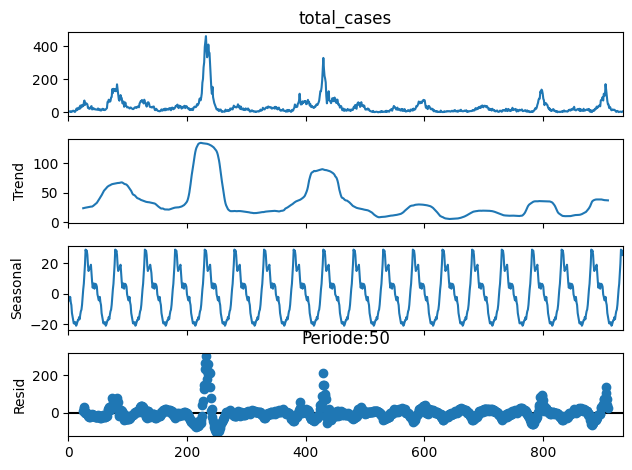

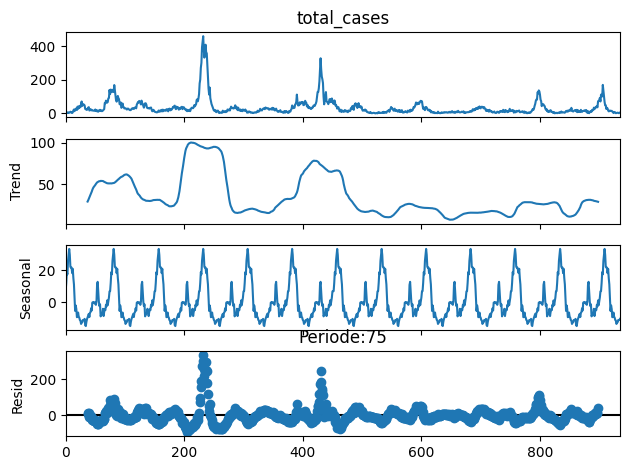

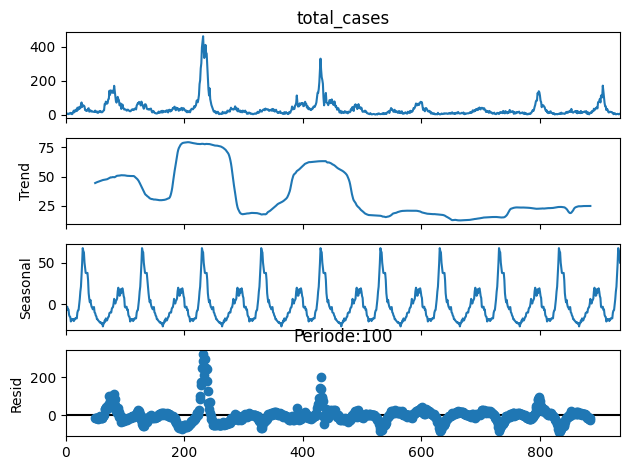

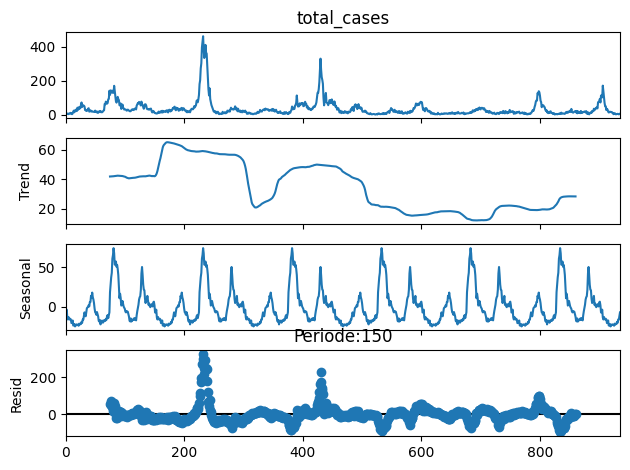

In [36]:
period = [25,50,75,100,150]
for i in period:
    result = seasonal_decompose(df_sj['total_cases'],period=i)
    result.plot()
    plt.title('Periode:' + str(i))
    plt.show()